# Problem Set 4

## Yanwei Pan
panyw@uchicago.edu

### Problem 1

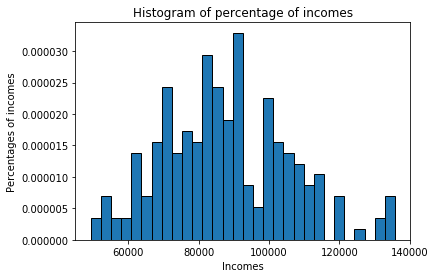

In [2]:
#a
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import scipy.optimize as opt
import pandas as pd

incomes = np.loadtxt('data/incomes.txt', dtype=np.float64)
num_bins = 30
plt.hist(incomes, num_bins, edgecolor='k', density=True)
plt.xlabel('Incomes')
plt.ylabel('Percentages of incomes')
plt.title('Histogram of percentage of incomes')
plt.show()

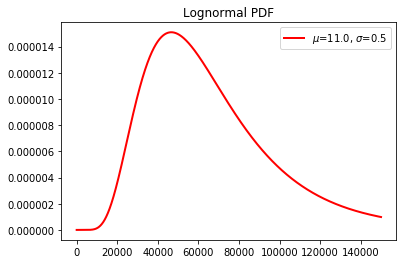

In [4]:
#b
dist_pts = np.linspace(0, 150000, 300000)
mu_1 = 11.0
sig_1 = 0.5
plt.plot(dist_pts, lognorm.pdf(dist_pts, s=sig_1, scale=np.exp(mu_1)),
         linewidth=2, color='r', label='$\mu$=11.0, $\sigma$=0.5')
plt.title('Lognormal PDF')
plt.legend(loc='best')
plt.show()

In [5]:
pdf_val = lognorm.pdf(incomes, sig_1, scale=np.exp(mu_1))
ln_pdf_val = np.log(pdf_val)
log_lik_vals = ln_pdf_val.sum()
log_lik_vals

-2385.856997808558

In [8]:
#c
def crit_ln(params, *args):
    mu, sigma = params
    x = args
    pdf_vals = lognorm.pdf(x, sigma, scale=np.exp(mu))
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    neg_log_like = -log_lik_val
    return neg_log_like

mu_init = 11.0
sigma_init = 0.5
params_init = np.array([mu_init, sigma_init])
results = opt.minimize(crit_ln, params_init, args=(incomes), method='L-BFGS-B',
                            bounds=((0, 150000), (1e-10, None)))
opt_mu = results.x[0]
opt_sigma = results.x[1]
func_val = results.fun
vari_covar_mat = results.hess_inv.todense()
print('The optimistic mu={}'.format(opt_mu))
print('The optimistic sigma={}'.format(opt_sigma))
print('The value of the likelihood function={}'.format(func_val))
print('The variance-covariance matrix={}'.format(vari_covar_mat))

The optimistic mu=11.49501610420938
The optimistic sigma=0.31087921260237417
The value of the likelihood function=2285.899954438386
The variance-covariance matrix=[[ 4.59466401e-04 -6.65450949e-05]
 [-6.65450949e-05  1.71221361e-03]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


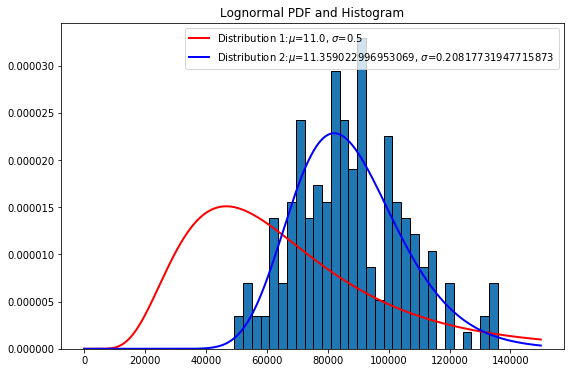

In [104]:
plt.figure(figsize=(9,6))
plt.hist(incomes, num_bins, edgecolor='k', density=True)

dist_pts = np.linspace(0, 150000, 300000)
mu_1 = 11.0
sig_1 = 0.5
plt.plot(dist_pts, lognorm.pdf(dist_pts, s=sig_1, scale=np.exp(mu_1)),
         linewidth=2, color='r', label='Distribution 1:$\mu$=11.0, $\sigma$=0.5')

plt.plot(dist_pts, lognorm.pdf(dist_pts, s=opt_sigma, scale=np.exp(opt_mu)),
         linewidth=2, color='b', label='Distribution 2:$\mu$={}, $\sigma$={}'.format\
        (opt_mu, opt_sigma))

plt.title('Lognormal PDF and Histogram')
plt.legend(loc="best")
plt.show()

In [9]:
#d
log_like_h0 = log_lik_vals
log_like_mle = -func_val
like_ratio_val = 2 * (log_like_mle - log_like_h0)
p_value = 1.0 - sts.chi2.cdf(like_ratio_val, 2)
print('The probability that incomes came from the distribution 1 = {}'.format(p_value))

The probability that incomes came from the distribution 1 = 0.0


In [105]:
#e
p_100000 = 1.0 - lognorm.cdf(100000, opt_sigma, scale=np.exp(opt_mu))
p_75000 = lognorm.cdf(75000, opt_sigma, scale=np.exp(opt_mu))
print('The probability that you will earn more than $100,000={}'.format(p_100000))
print('the probability that you will earn less than $75,000={}'.format(p_75000))

The probability that you will earn more than $100,000=0.2298668344195709
the probability that you will earn less than $75,000=0.26023426716079623


### Problem 2

In [10]:
#a
sick_df = pd.read_csv('data/sick.txt')
sick = sick_df['sick']
age = sick_df['age']
children = sick_df['children']
temp_winter = sick_df['avgtemp_winter']
sick_df

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90
...,...,...,...,...
195,0.53,30.56,0.74,41.76
196,0.86,33.97,1.40,39.10
197,1.39,44.00,2.45,40.95
198,0.72,22.30,1.03,23.14


In [49]:
def crit_lr(params, args):
    b0, b1, b2, b3, sigma = params
    y, x1, x2, x3 = args
    epsilon = y - b0 - b1 * x1 - b2 * x2 - b3 * x3
    pdf_vals = sts.norm.pdf(epsilon, loc=0, scale=abs(sigma))
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    neg_log_like = -log_lik_val
    return neg_log_like

param_init = np.array([2, 0.1, 1, 0.1, 1])
arg = (sick, age, children, temp_winter)
re = opt.minimize(crit_lr, param_init, (arg,))
opt_b0, opt_b1, opt_b2, opt_b3, opt_sig = re.x
lr_fun_val = -re.fun
lr_var_cov_mat = re.hess_inv
print('The estimation of b0={}, b1={}, b2={}, b3={}, variance={}'.format\
      (opt_b0, opt_b1, opt_b2, opt_b3, opt_sig ** 2))
print('The value of the likelihood function={}'.format(lr_fun_val))
print('The variance-covariance matrix={}'.format(lr_var_cov_mat))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


The estimation of b0=0.2516464954565546, b1=0.012933367505046495, b2=0.4005019541303021, b3=-0.009991682082879007, variance=9.106651961520002e-06
The value of the likelihood function=876.8650474066094
The variance-covariance matrix=[[ 7.52024001e-07  1.94565392e-09 -9.24076620e-08 -1.43534897e-08
  -2.54254088e-09]
 [ 1.94565392e-09  3.73461225e-09 -3.22071346e-08 -2.26963345e-09
   2.08555372e-11]
 [-9.24076620e-08 -3.22071346e-08  3.17198604e-07  1.98163410e-08
  -4.72624710e-10]
 [-1.43534897e-08 -2.26963345e-09  1.98163410e-08  1.66862013e-09
   6.66056599e-11]
 [-2.54254088e-09  2.08555372e-11 -4.72624710e-10  6.66056599e-11
   2.12576485e-08]]


In [52]:
#b
params_h0 = np.array([1.0, 0, 0, 0, np.sqrt(0.01)])
lr_log_like_h0 = -crit_lr(params_h0, args=(sick, age, children, temp_winter))
lr_log_like_mle = lr_fun_val
lr_like_ratio_val = 2 * (lr_log_like_mle - lr_log_like_h0)
lr_p_value = 1.0 - sts.chi2.cdf(lr_like_ratio_val, 5)
print('The likelihood that age, number of children, \
and average winter temperature have no effect on the \
number of sick days = {}'.format(lr_p_value))

The likelihood that age, number of children, and average winter temperature have no effect on the number of sick days = 0.0
